In [1]:
# Analisar a data de nascimento dos americanos identificando o dia em que nasceram
# Deve ser feito uma análise para identificar a ocorrencia com base nos ultimos anos

#source >> https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

births = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")


births
#births.describe()

#births.head()

# inferindo em qual decada o registro se encontra utilizando modulo 10

births['decade'] = 10 * (births['year'] // 10)

births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


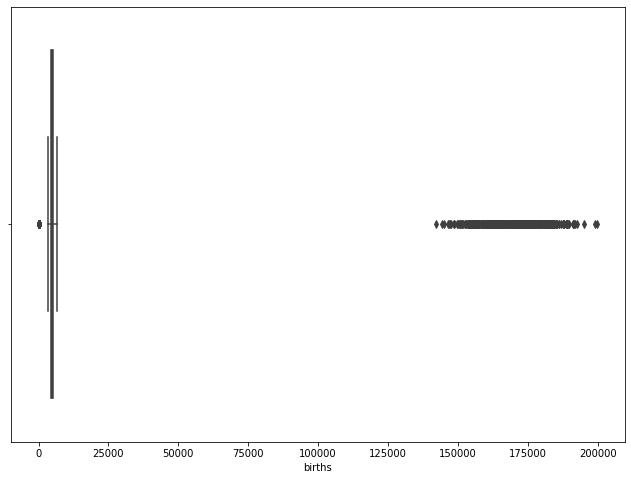

In [2]:
fig = plt.figure(figsize = (11,8))
fig = sns.boxplot(births.births)

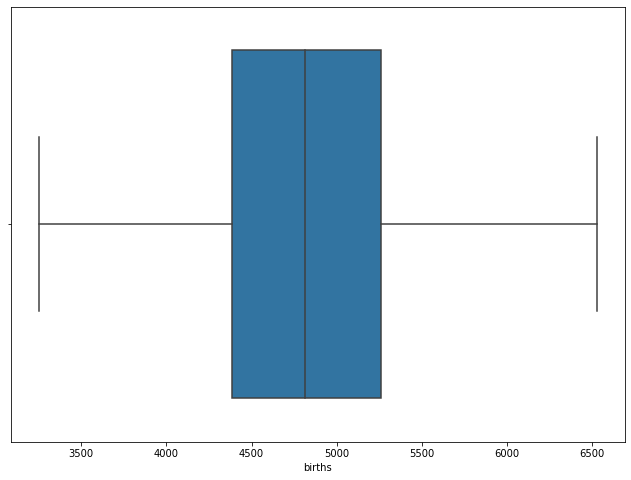

In [3]:
# Cuidando dos outliers
# Eliminando tudo que é menor que 1k e maior que 100k
births = births.query('(births > 1000) & (births < 100000)')

fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)


In [4]:
births.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
year      14610 non-null int64
month     14610 non-null int64
day       14610 non-null float64
gender    14610 non-null object
births    14610 non-null int64
decade    14610 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [5]:
# Convertendo para inteiro o ano, mes e dia
# Pelo que eu havia observado somente o dia que não estava como Inteiro
for campo in ["day", "month", "year"]:
    births[campo] = births[campo].astype(int)

births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
year      14610 non-null int64
month     14610 non-null int64
day       14610 non-null int64
gender    14610 non-null object
births    14610 non-null int64
decade    14610 non-null int64
dtypes: int64(5), object(1)
memory usage: 799.0+ KB


In [6]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
year      14610 non-null int64
month     14610 non-null int64
day       14610 non-null int64
gender    14610 non-null object
births    14610 non-null int64
decade    14610 non-null int64
dtypes: int64(5), object(1)
memory usage: 799.0+ KB


In [7]:
# Criando um indice com base no ano - mes - dia

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')





In [8]:
# Inferindo o dia da semana com base no indice do DataFrame
births['diaDaSemana'] = births.index.dayofweek

births.head()



,year,month,day,gender,births,decade,diaDaSemana
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


Text(0.5, 0, 'Dia da Semana')

<Figure size 1080x576 with 0 Axes>

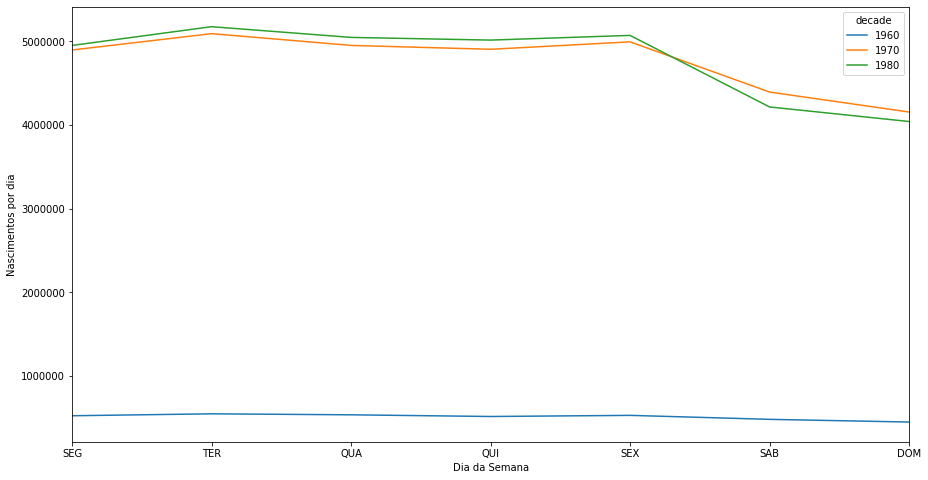

In [9]:
fig = plt.figure(figsize=(15,8))
#criando serie com base no dia da semana e a decada agregando com soma
births_per_day = births.pivot_table('births', index = 'diaDaSemana', columns='decade', aggfunc='sum')

births_per_day.plot(figsize=(15,8))

#Setando labels eixo X
plt.gca().set_xticklabels(['SEG','TER','QUA','QUI','SEX','SAB','DOM'])

#Setando lable eixo Y
plt.ylabel("Nascimentos por dia")
plt.xlabel("Dia da Semana")


Text(0.5, 0, 'Dia da Semana')

<Figure size 1080x576 with 0 Axes>

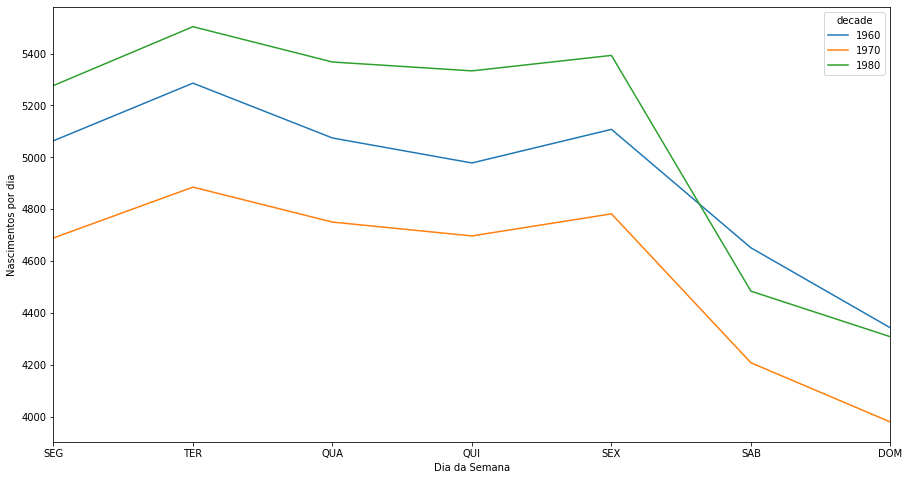

In [11]:
fig = plt.figure(figsize=(15,8))
#criando serie com base no dia da semana e a decada agregando com soma
births_per_day = births.pivot_table('births', index = 'diaDaSemana', columns='decade', aggfunc='mean')

births_per_day.plot(figsize=(15,8))

#Setando labels eixo X
plt.gca().set_xticklabels(['SEG','TER','QUA','QUI','SEX','SAB','DOM'])

#Setando lable eixo Y
plt.ylabel("Nascimentos por dia")
plt.xlabel("Dia da Semana")    
